# Flight Performance of US Carriers in All Major US Airport
## by Maria Soccoro Ingco

## Investigation Overview

- The goal of the investigation was to determine the flight performance of carriers, such as the overall on-time arrival rate, typical causes of delays and the busiest months in the year.

## Dataset Overview

- The dataset used for this analysis was taken from <a href="https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?pn=1">Bureau of Transportation Statistics</a>.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
flight = pd.read_csv('airline_delay.csv')

In [3]:
# Drop unnamed columns
flight.drop(flight.columns[flight.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# Drop empty rows
t_flight = flight.dropna(subset = ['arr_del15'])

### On-time Arrivals
From 2015-2019, the overall on-time performance was ~80%.

In [4]:
# Get sum of total arrivals and delays
arrival = t_flight.arr_flights.sum()
delay = t_flight[['carrier_ct', ' weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 
                  'arr_cancelled', 'arr_diverted']].sum().sum()

In [5]:
# Compute on-time arrival rate and delayed arrival rate
del_rate = delay / arrival
arr_rate = 1 - del_rate

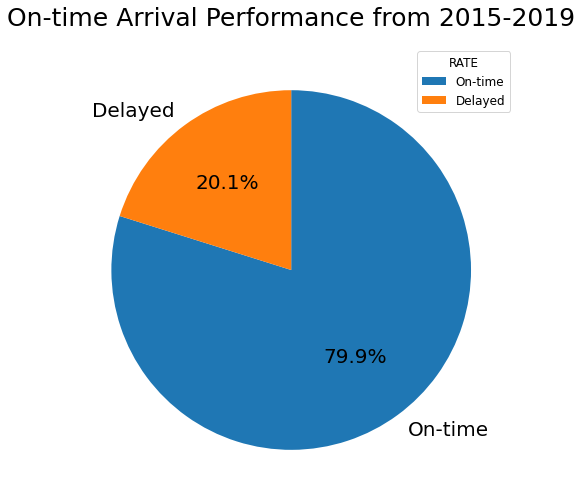

In [6]:
# Create a chart showing on-time performance
plt.figure(figsize=(11.69, 8.27))
plt.pie([arr_rate, del_rate], labels=['On-time', 'Delayed'], autopct='%1.1f%%', startangle=90, counterclock=False,
       textprops={'size': 20})
plt.title('On-time Arrival Performance from 2015-2019', size=25, pad=20)
plt.legend(title='RATE', title_fontsize='large', fontsize='large');

### Causes of Delays

The top reason for delay was due to national aviation system at 32.9%, which according to <a href="https://www.transtats.bts.gov/OT_Delay/ot_delaycause1.asp?6B2r=I&20=E">Bureau of Transportation Statistics</a> includes weather condition, high volume of flights, and closed runways. Not a far second place was due aircraft arriving late at 31.8%. Capping the top 3 causes of delay was the air carrier delay at 23.4%.

In [7]:
# Compute percentage of each cause of delay
carrier = 100 * t_flight.carrier_ct.sum() / delay
weather = 100 * t_flight[[' weather_ct']].sum() / delay
nas = 100 * t_flight.nas_ct.sum() / delay
security = 100 * t_flight.security_ct.sum() / delay
late = 100 * t_flight.late_aircraft_ct.sum() / delay
cancelled = 100 * t_flight.arr_cancelled.sum() / delay
diverted = 100 * t_flight.arr_diverted.sum() / delay

In [8]:
# Create a list containing rate of each reason for delay
list = [['Carrier', carrier], ['Weather', weather], ['NAS', nas], ['Security', security], ['Late Aircraft', late], 
        ['Cancelled', cancelled], ['Diverted', diverted]]

# Store list in a data frame
reason = pd.DataFrame(list, columns=['reason', 'rate'], dtype=float)

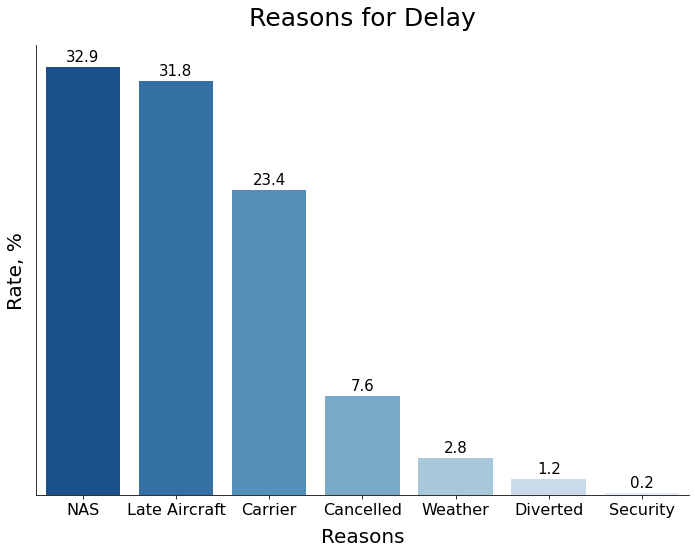

In [9]:
# Sort data in descending order
del_order = reason.sort_values(by=['rate'], ascending=False, inplace=True)

# Create a chart showing the different reasons for delay
plt.figure(figsize=(11.69, 8.27))
plot2 = sb.barplot(x='reason', y='rate', data=reason, palette='Blues_r')

for p in plot2.patches:
    plot2.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points', size=15)

plt.title('Reasons for Delay', size=25, pad=20)
plt.xlabel('Reasons', size=20, labelpad=10)
plt.xticks(size=16)
plt.ylabel('Rate, %', size=20, labelpad=10)
plt.yticks([], [])
sb.despine();

However, when we looked into which among these reasons had caused the longest time delay, we can see that the order is a little bit different with late aircraft accounting for the longest delay of ~3.5days on average.

*Note: Cancelled and diverted have no time element.*

In [10]:
# Get average minutes of delay
car_ave = t_flight[' carrier_delay'].mean()
wea_ave = t_flight['weather_delay'].mean()
nas_ave = t_flight['nas_delay'].mean()
sec_ave = t_flight['security_delay'].mean()
late_ave = t_flight['late_aircraft_delay'].mean()

In [11]:
# Create a list containing total minutes of each reason for delay
list2 = [['Carrier', car_ave], ['NAS', nas_ave], ['Security', sec_ave], ['Late Aircraft', late_ave]]

# Store list in a data frame
time_ave = pd.DataFrame(list2, columns=['reason_t', 'ave'], dtype=float)
time_ave

,reason_t,ave
0,Carrier,4114.679260
1,NAS,3961.876388
2,Security,18.685501
3,Late Aircraft,5342.529357


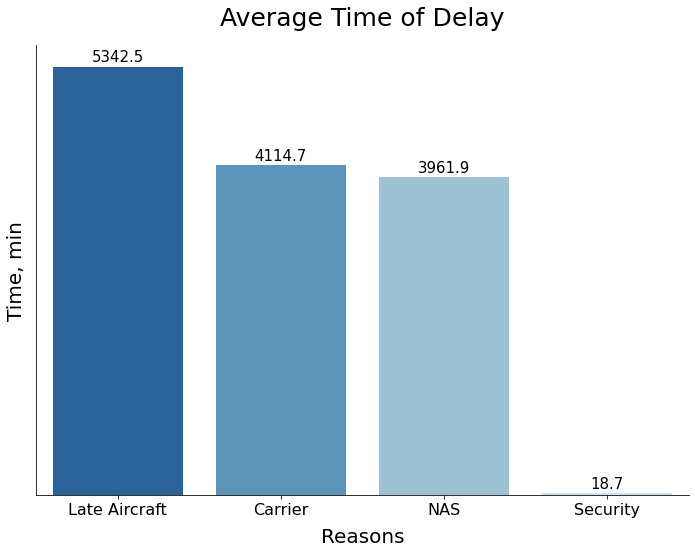

In [12]:
# Sort data in descending order
time_order = time_ave.sort_values(by=['ave'], ascending=False, inplace=True)

#Create a bar chart showing the reasons for delay
plt.figure(figsize=(11.69, 8.27))
plot3 = sb.barplot(x='reason_t', y='ave', data=time_ave, palette='Blues_r')

for p in plot3.patches:
    plot3.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points', size=15)

plt.title('Average Time of Delay', size=25, pad=20)
plt.xlabel('Reasons', size=20, labelpad=10)
plt.ylabel('Time, min', size=20, labelpad=10)
plt.xticks(size=16)
plt.yticks([], [])
sb.despine();

### Arrivals and Delays Relationship

In general, it was observed that higher number of arrivals resulted to higher delays, both in counts and time delay. It was seen that during the months of June to August that the highest number of arrivals and delays and the longest time delays were recorded.

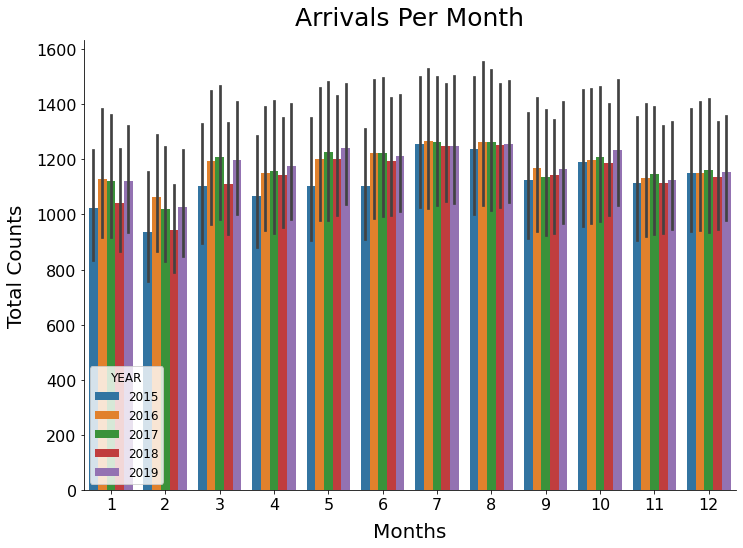

In [13]:
# Create chart showing arrivals per month each year
plt.figure(figsize=(11.69, 8.27))
sb.barplot(x = ' month', y = 'arr_flights', hue='year', data=t_flight)
plt.title('Arrivals Per Month', size=25, pad=15)
plt.xlabel('Months', size=20, labelpad=10)
plt.xticks(size=16)
plt.ylabel('Total Counts', size=20, labelpad=10)
plt.yticks(size=16)
plt.legend(title='YEAR', loc=3, title_fontsize='large', fontsize='large')
sb.despine();

In [14]:
# Get % delay of each carrier
del_percent = t_flight['arr_del15'] / t_flight['arr_flights']

# Add % delay column into the dataframe
t_flight['%_delay'] = del_percent
t_flight.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,%_delay
0,2016,11,OO,SkyWest Airlines Inc.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",80.0,15.0,6.63,0.00,...,5.57,0.0,0.0,1674.0,1280.0,0.0,82.0,0.0,312.0,0.187500
1,2016,11,OO,SkyWest Airlines Inc.,LGA,"New York, NY: LaGuardia",3.0,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,2016,11,OO,SkyWest Airlines Inc.,IAD,"Washington, DC: Washington Dulles International",31.0,10.0,1.88,1.25,...,5.12,0.0,0.0,669.0,269.0,100.0,91.0,0.0,209.0,0.322581
3,2016,11,OO,SkyWest Airlines Inc.,DCA,"Washington, DC: Ronald Reagan Washington National",12.0,2.0,1.00,0.00,...,0.00,0.0,0.0,37.0,20.0,0.0,17.0,0.0,0.0,0.166667
4,2016,11,UA,United Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2323.0,478.0,131.46,5.77,...,97.29,6.0,5.0,22451.0,6858.0,436.0,7906.0,0.0,7251.0,0.205768


In [15]:
# Create pivot table showing % delay per month
pivot1 = t_flight.pivot_table(values='%_delay', index=' month', columns='year').fillna(0)
round(pivot1, 2)

year,2015,2016,2017,2018,2019
month,,,,,
1,0.23,0.17,0.25,0.19,0.21
2,0.25,0.17,0.19,0.20,0.25
3,0.21,0.20,0.21,0.18,0.19
4,0.18,0.17,0.22,0.20,0.20
5,0.20,0.17,0.23,0.21,0.23
6,0.25,0.22,0.25,0.24,0.26
7,0.23,0.24,0.23,0.25,0.24
8,0.20,0.23,0.21,0.25,0.23
9,0.15,0.17,0.14,0.19,0.17


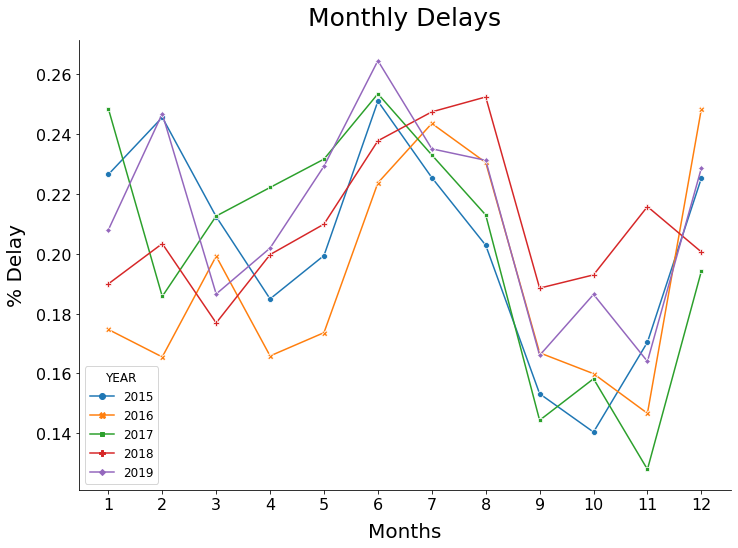

In [16]:
# Create a chart showing in-month % delay
mticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
mlabels = ['{}'.format(v) for v in mticks]
plt.figure(figsize=(11.69, 8.27))
sb.lineplot(data=pivot1, markers=True, dashes=False)
plt.xticks(mticks, mlabels)
plt.title('Monthly Delays', size=25, pad = 15)
plt.xlabel('Months', size=20, labelpad=10)
plt.xticks(size=16)
plt.ylabel('% Delay', size=20, labelpad=10)
plt.yticks(size=16)
plt.legend(title='YEAR', loc=0, fontsize='large', title_fontsize='large')
sb.despine();

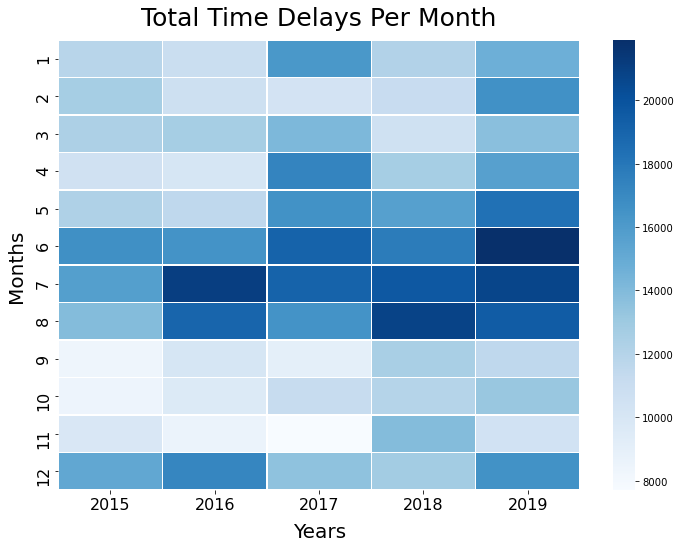

In [17]:
# Create a pivot table showing total time delay per month per year
pivot2 = t_flight.pivot_table(values=' arr_delay', index=' month', columns='year').fillna(0)

# Create a chart showing time delays per month per year
plt.figure(figsize=(11.69, 8.27))
sb.heatmap(pivot2, cmap='Blues', linewidths=0.5)
plt.title('Total Time Delays Per Month', size=25, pad=15)
plt.xlabel('Years', size=20, labelpad=10)
plt.xticks(size=16)
plt.ylabel('Months', size=20, labelpad=10)
plt.yticks(size=16);

In [18]:
! jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 838895 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Inx\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Inx\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Inx\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Inx\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Inx\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users